In this tutorial we will be illustrating how to apply K Means algorithm to a dataset.We here have a data of customers who buy things at a mall.In the data set there are information like Sex,Age,Income and Spending Score.We will immplement K means clustering on the data and then see what conclusion we can arrive at.This is a work in process and I will be updating the kernel in the coming days.If you like my work please do vote.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Mall_Customers.csv']


**Importing the Python modules**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import warnings 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

**Importing the dataset**

In [3]:
df=pd.read_csv('../input/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


So in the data set we have the Customer Id, Genre, Age, Annual Income and the Spending Score of the customer making purchase at the mall.Spending score of 1 means less purchase and 100 means more purchase being done by the customer

**Exploring the data set**

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


We can see median age and income of the dataset is 36 and 61.5 respectively

**Distribution plot **

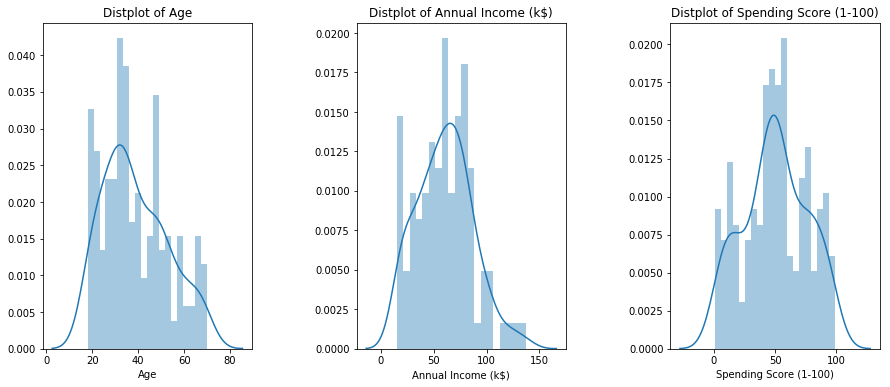

In [5]:
plt.figure(1,figsize=(15,6))
n=0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(df[x],bins=20)
    plt.title('Distplot of {}'.format(x))
plt.show()

**Finding the relation between Age,Annual income and Spening Score**

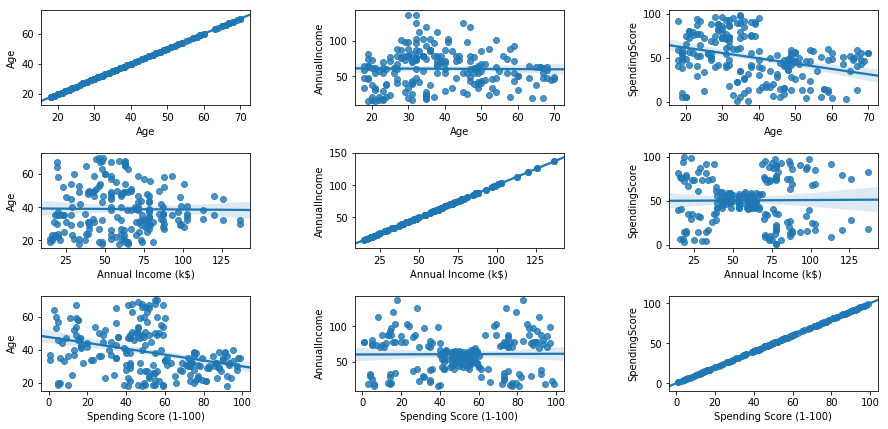

In [6]:
plt.figure(1,figsize=(15,7))
n=0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    for y in ['Age','Annual Income (k$)','Spending Score (1-100)']:
        n+=1
        plt.subplot(3,3,n)
        plt.subplots_adjust(hspace=0.5,wspace=0.5)
        sns.regplot(x=x,y=y,data=df)
        plt.ylabel(y.split()[0]+''+y.split()[1] if len(y.split())>1 else y)
plt.show()

**Generating Array of Features**

In [7]:
X=df.iloc[:,[3,4]].values # We are considering Annual income and Spending Score as the features 

K Means clustering is an unsupervised learning algorithm.So there is no need to specify target variable.The algorithm with do a clustring and give us a result.

**Using Elbow method to find the optiminal cluster number**

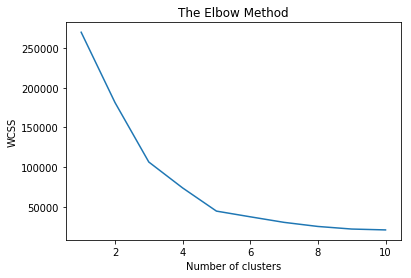

In [8]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Applying K means to the Dataset**

In [9]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X)

**Visualizing the clusters**

<function matplotlib.pyplot.show(*args, **kw)>

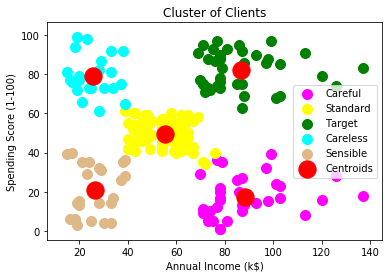

In [10]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='magenta',label='Careful')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='yellow',label='Standard')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Target')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='cyan',label='Careless')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='burlywood',label='Sensible')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red',label='Centroids')
plt.title('Cluster of Clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show

Cluster 1- High income low spending =Careful

Cluster 2- Medium income medium spending =Standard

Cluster 3- High Income and high spending =Target

Cluster 4- Low Income and high spending =Careless

Cluster 5- Low Income and low spending =Sensible

**Finding the relation between Age and spending score**

**Generating Array of Features**

In [11]:
X1=df.iloc[:,[2,4]].values # We are considering Annual income and Spending Score as the features 
#X1

**Using Elbow method to find the optiminal cluster number**

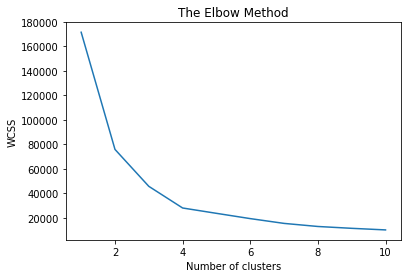

In [12]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the elbow plot we can see that we can get best result by considering four clusters 

**Applying K means to the Dataset**

In [13]:
kmeans=KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X1)

**Visualizing the clusters**

<function matplotlib.pyplot.show(*args, **kw)>

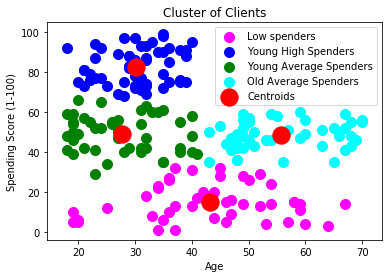

In [14]:
plt.scatter(X1[y_kmeans==0,0],X1[y_kmeans==0,1],s=100,c='magenta',label='Low spenders ')
plt.scatter(X1[y_kmeans==1,0],X1[y_kmeans==1,1],s=100,c='blue',label='Young High Spenders')
plt.scatter(X1[y_kmeans==2,0],X1[y_kmeans==2,1],s=100,c='green',label='Young Average Spenders')
plt.scatter(X1[y_kmeans==3,0],X1[y_kmeans==3,1],s=100,c='cyan',label='Old Average Spenders')
#plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='burlywood',label='Sensible')
#plt.scatter(X[y_kmeans==5,0],X[y_kmeans==5,1],s=100,c='blue',label='Sensible')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red',label='Centroids')
plt.title('Cluster of Clients')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.ioff()
plt.show

So we can cluster the data into four groups.

1.Low spenders 

2.Young High Spenders 

3.Young Average Spenders 

4.Old Average spenders 

We can clearly see that Only young people(18-40 age group) are involved in High Spending.As age increases people fall into average or Low spending catogery.

**Finding out the relation between Age and Income **

#### Creating matrix of features 

In [15]:
X2=df.iloc[:,[2,3]].values # We are considering Annual income and Spending Score as the features 
#X2

#### Elbow method to find optimum cluster 

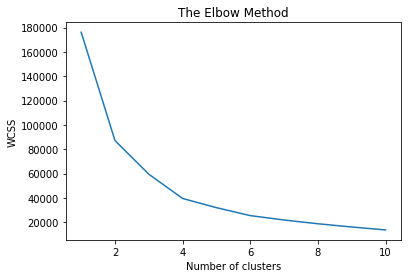

In [16]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

I will be taking 6 as the optimun number of clusters 

#### Applying K means to the Dataset

In [17]:
kmeans=KMeans(n_clusters=6,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X2)

#### Visualizing the clusters

<function matplotlib.pyplot.show(*args, **kw)>

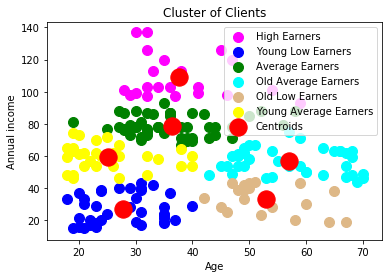

In [18]:
plt.scatter(X2[y_kmeans==0,0],X2[y_kmeans==0,1],s=100,c='magenta',label='High Earners ')
plt.scatter(X2[y_kmeans==1,0],X2[y_kmeans==1,1],s=100,c='blue',label='Young Low Earners')
plt.scatter(X2[y_kmeans==2,0],X2[y_kmeans==2,1],s=100,c='green',label='Average Earners')
plt.scatter(X2[y_kmeans==3,0],X2[y_kmeans==3,1],s=100,c='cyan',label='Old Average Earners')
plt.scatter(X2[y_kmeans==4,0],X2[y_kmeans==4,1],s=100,c='burlywood',label='Old Low Earners ')
plt.scatter(X2[y_kmeans==5,0],X2[y_kmeans==5,1],s=100,c='yellow',label='Young Average Earners')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red',label='Centroids')
plt.title('Cluster of Clients')
plt.xlabel('Age')
plt.ylabel('Annual income')
plt.legend()
plt.ioff()
plt.show

We can see people in age group 0f 30-40 have high number of high income people

**Finding out the relation between Age,Annual Income and spending score **

In [19]:
X3 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

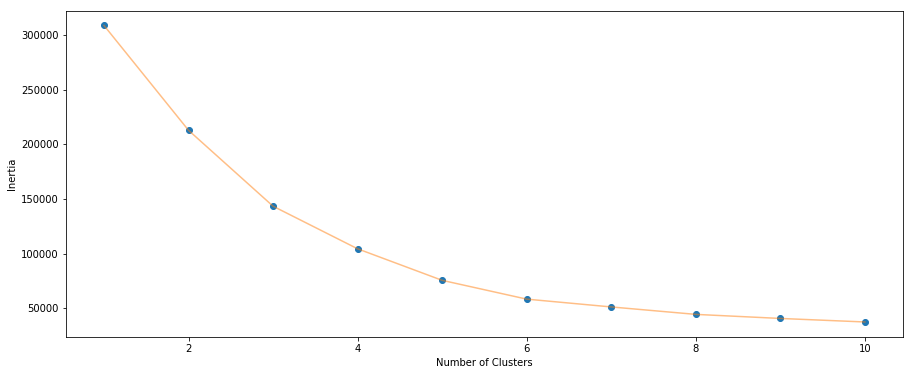

In [20]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [21]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [22]:
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected = True)
df['label3'] =  labels3
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['label3'], 
        size= 20,
        line=dict(
            color= df['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)
plt.show()

**Spending score based on age**

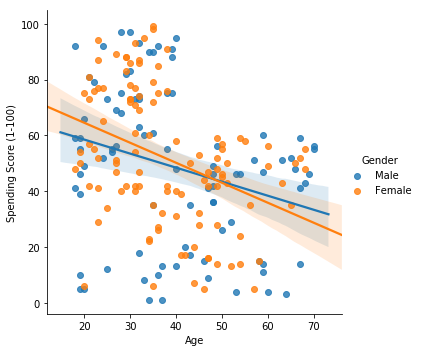

In [23]:
sns.lmplot(x='Age', y='Spending Score (1-100)', data=df,fit_reg=True,hue='Gender')
plt.show()

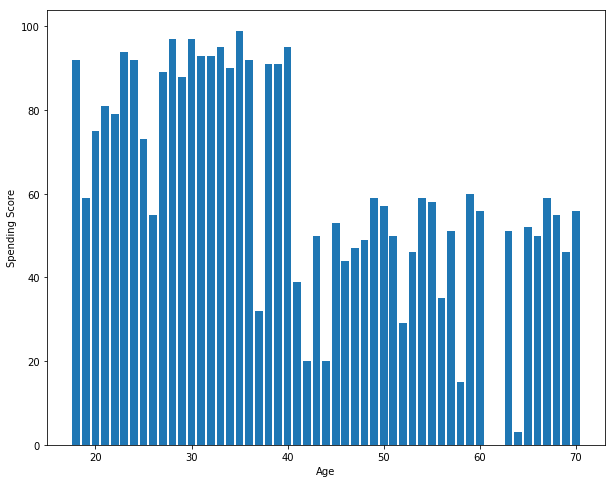

In [24]:
df.sort_values(['Age'])
plt.figure(figsize=(10,8))
plt.bar(df['Age'],df['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

Men and Women spend for in their 20s & 30s and later one the spending goes down.This could be because in later stages other family responsibilities increase.

**Encoding the Gender data **

In [25]:
label_encoder=LabelEncoder()
integer_encoded=label_encoder.fit_transform(df.iloc[:,1].values)
df['Gender']=integer_encoded
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label3
0,1,1,19,15,39,4
1,2,1,21,15,81,5
2,3,0,20,16,6,4
3,4,0,23,16,77,5
4,5,0,31,17,40,4


We can see that the Male,Female values in the Gender column have been replaced by 1 and 0 respectively.This will help us to carry out further analysis on the dataset.

**Heat map**

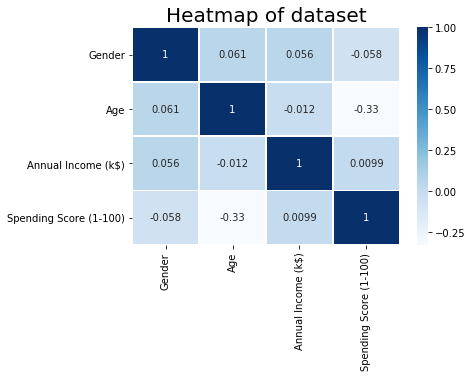

In [26]:
hm=sns.heatmap(df.iloc[:,1:5].corr(), annot = True, linewidths=.5, cmap='Blues')
hm.set_title(label='Heatmap of dataset', fontsize=20)
hm
plt.ioff()

There isnt very good correlation between the Spending score and Annual income,Age and Gender.